### Import Python Methods

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score

import warnings
warnings.filterwarnings("ignore")

from acquire import get_telco_data
from prepare import prep_telco_data_explore
from prepare import prep_telco_data_model

# Data Exploration

### Estabolishing a Baseline

In [2]:
df = get_telco_data(cached = True)

In [3]:
# Churn is greater then 50 % for first 8 months of service
df = get_telco_data(cached = True)
month_one = df.tenure <= 8
test = df[month_one]
test.churn.value_counts(normalize = True)

Yes    0.505476
No     0.494524
Name: churn, dtype: float64

In [4]:
# Percent of Customers who Churned over 72 Months
df.churn.value_counts(normalize = True)

No     0.73463
Yes    0.26537
Name: churn, dtype: float64

In [5]:
# Annual Churn per year (6 Years, aka.72 Months)

In [6]:
# Year One
df['tenure_years'] = round(df.tenure / 12, 2)
year_one = df.tenure_years <= 1
test = df[year_one]
test.churn.value_counts(normalize = True)

No     0.525618
Yes    0.474382
Name: churn, dtype: float64

In [7]:
# Year two
df['tenure_years'] = round(df.tenure / 12, 2)
year_one = (df.tenure_years >= 2) & (df.tenure_years >=1)
test = df[year_one]
test.churn.value_counts(normalize = True)

No     0.857143
Yes    0.142857
Name: churn, dtype: float64

In [8]:
# Year three
df['tenure_years'] = round(df.tenure / 12, 2)
year_one = (df.tenure_years >= 3) & (df.tenure_years >=2)
test = df[year_one]
test.churn.value_counts(normalize = True)

No     0.879384
Yes    0.120616
Name: churn, dtype: float64

In [9]:
# Year four
df['tenure_years'] = round(df.tenure / 12, 2)
year_one = (df.tenure_years >= 4) & (df.tenure_years >=3)
test = df[year_one]
test.churn.value_counts(normalize = True)

No     0.903604
Yes    0.096396
Name: churn, dtype: float64

In [10]:
# Year Five
df['tenure_years'] = round(df.tenure / 12, 2)
year_one = (df.tenure_years >= 5) & (df.tenure_years >=4)
test = df[year_one]
test.churn.value_counts(normalize = True)

No     0.933243
Yes    0.066757
Name: churn, dtype: float64

In [11]:
# Year Six
df['tenure_years'] = round(df.tenure / 12, 2)
year_one = (df.tenure_years >= 6) & (df.tenure_years >=5)
test = df[year_one]
test.churn.value_counts(normalize = True)

No     0.983425
Yes    0.016575
Name: churn, dtype: float64

### Takeaways so far.... 
- Overall Churn Rate All Data (6 Years or 72 Months): 27%
- Churn Rate for 1st 8 Months > 50%
- Churn Rate for 1st Year: 47%, drops drastically after year one

# Identifying Churn Drivers

In [12]:
# Cleaned Data for Exploration
df_explore= prep_telco_data_explore(get_telco_data(cached = True))

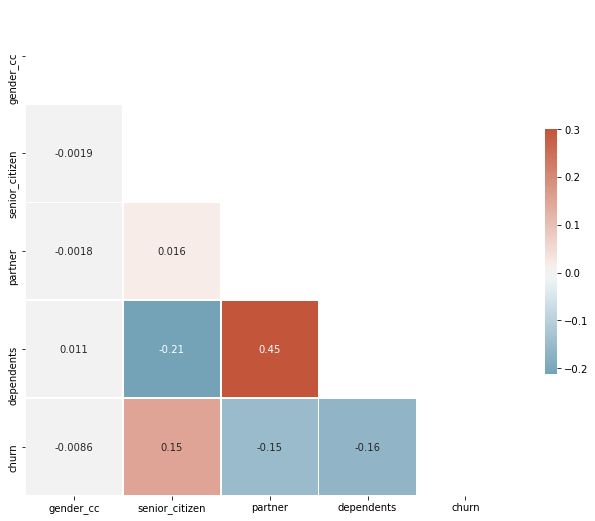

In [27]:
# Identify features to explore (Part One)
explore_heatmat = df_explore[['gender_cc', 'senior_citizen', 'partner', 'dependents', 'churn']]
# Compute the correlation matrix (all train)
corr = explore_heatmat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Takeaway so far...
- gender = Not a churn driver
- senior_citizen = 0.15 +
- partner = 0.15 -
- dependents = 0.16 -

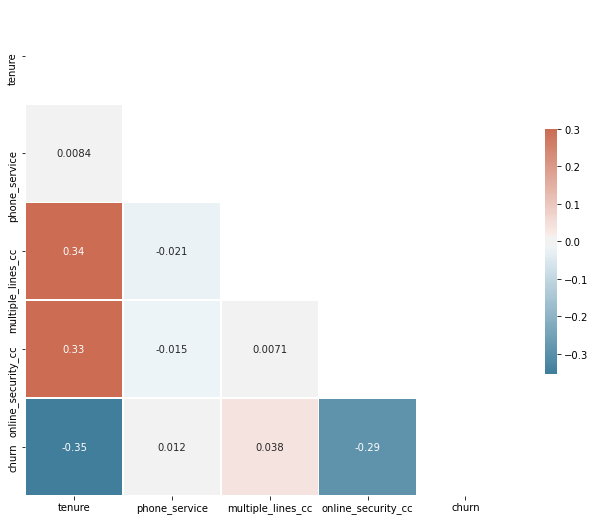

In [28]:
# Identify features to explore (Part Two)
explore_heatmat = df_explore[['tenure', 'phone_service', 'multiple_lines_cc', 'online_security_cc', 'churn']]
# Compute the correlation matrix (all train)
corr = explore_heatmat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Takeaway so far...
- tenure = 0.35 -
- phone_service = Not a churn driver
- multiple lines = Not a churn driver
- online_security = 0.29 -

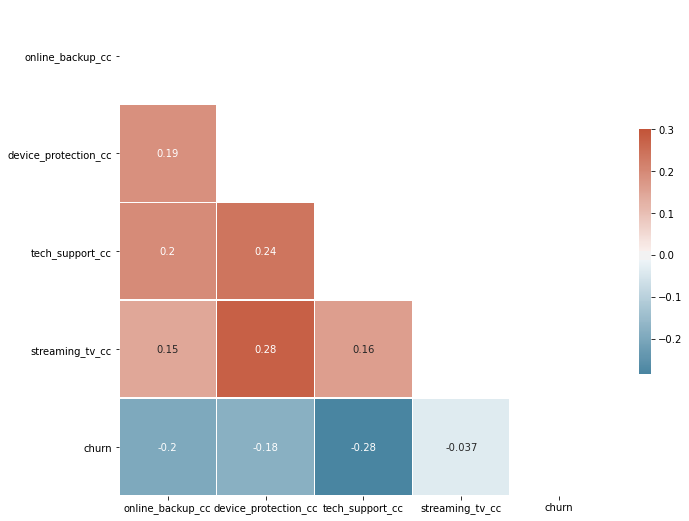

In [29]:
# Identify features to explore (Part Three)
explore_heatmat = df_explore[['online_backup_cc', 'device_protection_cc', 'tech_support_cc', 'streaming_tv_cc', 'churn']]
# Compute the correlation matrix (all train)
corr = explore_heatmat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Takeaway so far...
- online_backup = 0.20 -
- device_protection = .18 -
- tech_support = .28 -
- streaming_tv = Not a churn driver

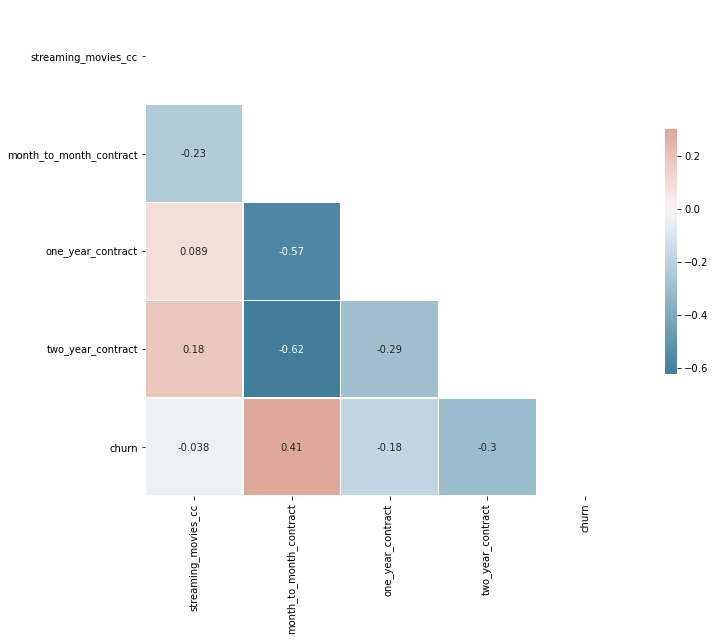

In [30]:
# Identify features to explore (Part Four)
explore_heatmat = df_explore[['streaming_movies_cc', 'month_to_month_contract', 'one_year_contract', 'two_year_contract', 'churn']]
# Compute the correlation matrix (all train)
corr = explore_heatmat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Takeaway so far...
- streaming_movies = Not a churn driver
- month_to_month_contract = 0.41 +
- one_year_contract = 0.18 -
- two_year_contract = 0.30 -

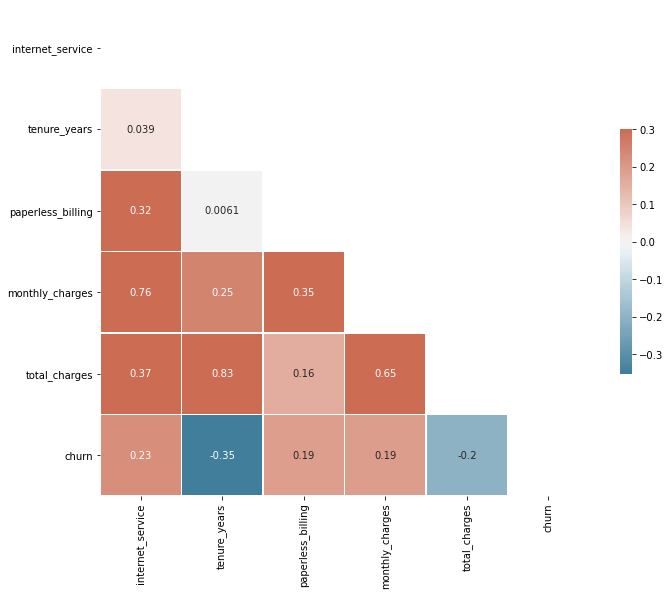

In [32]:
# Identify features to explore (Part Five)
explore_heatmat = df_explore[['internet_service', 'tenure_years', 'paperless_billing', 'monthly_charges', 'total_charges', 'churn']]
# Compute the correlation matrix (all train)
corr = explore_heatmat.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot = True, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Takeaway so far...
- internet_service = 0.23 +
- tenure_years = 0.35 -
- paperless_billing = 0.19 +
- monthly_charges = 0.19 +
- total_charges = 0.20 -

# Total Drivers of Churn (Correlations > .15)

- senior_citizen = 0.15 +
- partner = 0.15 -
- dependents = 0.16 -
- tenure = 0.35 -
- online_security = 0.29 -
- online_backup = 0.20 -
- device_protection = .18 -
- tech_support = .28 -
- month_to_month_contract = .41 +
- one_year_contract = .18 -
- two_year_contract = 0.30 -
- internet_service = 0.23 +
- tenure_years = 0.35 -
- paperless_billing = 0.19 +
- monthly_charges = 0.19 +
- total_charges = 0.20 -

### Positive Drivers
- senior_citizen = 0.15 +
- month_to_month_contract = .41 +
- internet_service = 0.23 +
- paperless_billing = 0.19 +
- monthly_charges = 0.19 +

### Negative Drivers
- partner = 0.15 -
- dependents = 0.16 -
- tenure = 0.35 -
- online_security = 0.29 -
- online_backup = 0.20 -
- device_protection = .18 -
- tech_support = .28 -
- one_year_contract = .18 -
- two_year_contract = 0.30 -
- tenure_years = 0.35 -
- total_charges = 0.20 -

# Final Takeaways

- Contract Type, Internet Service, and Tenure are the 3 Largest Drives Churn (+ and -)
- Leads me to create two hypotheses that might help to keep customers from leaving telco:
  - Hypothesis One: There is a difference in churn rate between internet service options, and will test this hypothesis with a Chi Squared Test.
  - Hypothesis Two: Of those with internet service, customers who utilize tech_support are less likely to churn.  

# Statistical Testing

#### Hypothesis One: Churn is affected by internet service type

$H_{0}$: Whether a person churns is independent of internet service type

$H_{a}$: Whether a person churns is not independent of internet service type

In [34]:
confidence_level = .95
alpha = round(1 - confidence_level,2)
alpha

0.05

In [41]:
#Sort service type and eliminate none before crosstab
dsl_fiber = df_explore.internet_service_type != 'None'
df_dsl_fiber = df_explore[dsl_fiber]

In [42]:
ctab = pd.crosstab(df_dsl_fiber.churn, df_dsl_fiber.internet_service_type)
ctab

internet_service_type,DSL,Fiber optic
churn,,
0,1962,1799
1,459,1297


In [45]:
# Statistical Test
Chi2, p, degf, expected = stats.chi2_contingency(ctab)
print(f'Our p-value is {p}.')
print(f'Our p-value is less than our alpha: {p < alpha}')

Our p-value is 2.2962170975696955e-73.
Our p-value is less than our alpha: True


#### Findings:
P-value is less than alpha so we reject the null hypothesis, ie. Our 𝑥2 test informs us that the two categories, churn and internet service, are not independent.

In [23]:
df_explore.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'paperless_billing', 'monthly_charges', 'total_charges', 'churn',
       'contract_type', 'internet_service_type', 'payment_type', 'gender_cc',
       'multiple_lines_cc', 'online_security_cc', 'online_backup_cc',
       'device_protection_cc', 'tech_support_cc', 'streaming_tv_cc',
       'streaming_movies_cc', 'month_to_month_contract', 'one_year_contract',
       'two_year_contract', 'internet_service', 'tenure_years'],
      dtype='object')

In [38]:
df_explore.internet_service_type

0        DSL
1        DSL
2        DSL
3        DSL
4        DSL
        ... 
7038    None
7039    None
7040    None
7041    None
7042    None
Name: internet_service_type, Length: 7043, dtype: object